In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
from scipy.stats import linregress
from matplotlib.dates import DateFormatter

# Read and display the Cleaned Data Output CSV File with Pandas
file = "life-expectancy-rates/03 clean data/clean_Life_Expectancy.csv"
df = pd.read_csv(file, encoding="ISO-8859-1")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
1645,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
1646,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
1647,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


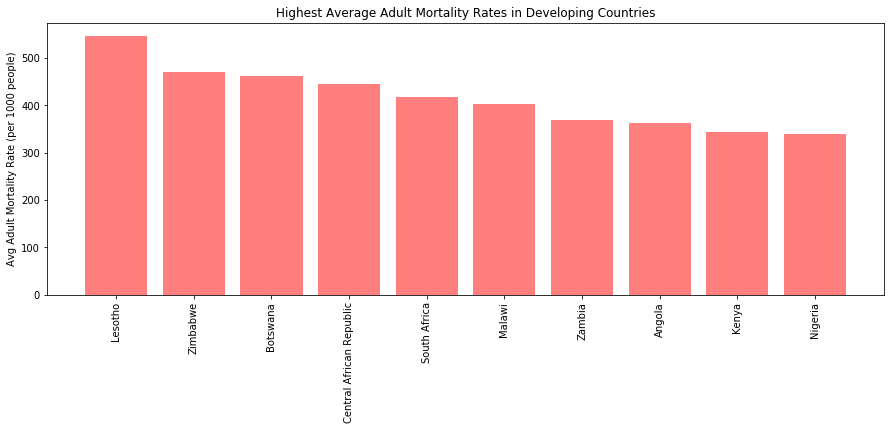

In [72]:
#Set our index as the development status (either developed or developing)
development_status_df = df.set_index("Status")

#Divide our data by their development status
developing = development_status_df.loc["Developing"]
developed = development_status_df.loc["Developed"]

#Take the average adult mortality rate for our developed and developing countries
developing_adult_mortality = developing.groupby('Country')['Adult Mortality'].mean()
developed_adult_mortality = developed.groupby('Country')['Adult Mortality'].mean()

#Sort developed and developing countries from highest mortality rate to lowest
developing_adult_mortality = developing_adult_mortality.sort_values(ascending=False)
developed_adult_mortality = developed_adult_mortality.sort_values(ascending=False)

#Capture the top ten countries with the highest mortality rates
top_developing_mortality = developing_adult_mortality.head(10)
top_developing_countries = ["Lesotho", "Zimbabwe", "Botswana", "Central African Republic",
                           "South Africa", "Malawi", "Zambia", "Angola", "Kenya", "Nigeria"]

#Set x-axis for bar chart
x_axis = np.arange(len(top_developing_mortality))
tick_locations = [value for value in x_axis]

#Create barchart using Matplotlib
plt.figure(figsize=(15,5))
plt.bar(x_axis, top_developing_mortality, color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, top_developing_countries, rotation="vertical")

#Title, label, save, and display our bar chart
plt.title("Highest Average Adult Mortality Rates in Developing Countries")
plt.ylabel("Avg Adult Mortality Rate (per 1000 people)")
plt.rcParams.update({'font.size': 10})
plt.savefig("Mortality_Developing_Countries.png")
plt.show()

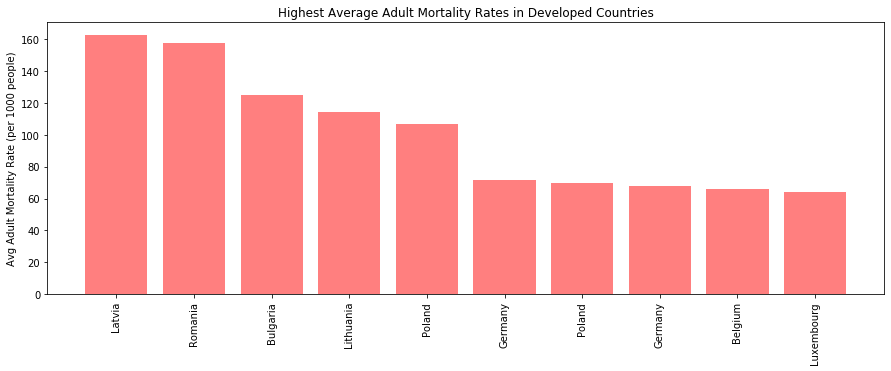

In [73]:
#Capture top ten developed countries with highest mortality rates
top_developed_mortality = developed_adult_mortality.head(10)
top_developed_countries = ["Latvia", "Romania", "Bulgaria", "Lithuania", "Poland",
                          "Germany", "Poland", "Germany", "Belgium", "Luxembourg"]

#Set x-axis for bar chart
x_axis = np.arange(len(top_developed_mortality))
tick_locations = [value for value in x_axis]

#Create bar chart for top ten developed countries with highest mortality rates
plt.figure(figsize=(15,5))
plt.bar(x_axis, top_developed_mortality, color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, top_developed_countries, rotation="vertical")

#Title, lable, save and display our bar chart
plt.title("Highest Average Adult Mortality Rates in Developed Countries")
plt.ylabel("Avg Adult Mortality Rate (per 1000 people)")
plt.rcParams.update({'font.size': 10})
plt.savefig("Mortality_Developed_Countries.png")
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

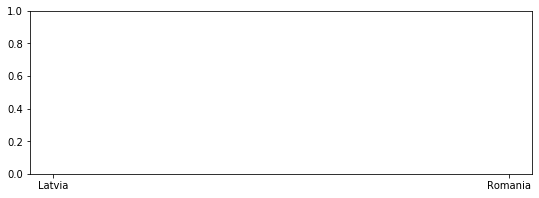

In [96]:

highest_developed_v_developing = pd.concat([top_developed_mortality, top_developing_mortality], axis=1, sort=True)

combined_top_countries = ["Latvia", "Romania", "Bulgaria", "Lithuania", "Poland","Germany", "Poland", "Germany", "Belgium", "Luxembourg"
                         "Lesotho", "Zimbabwe", "Botswana", "Central African Republic","South Africa", "Malawi", "Zambia", "Angola", "Kenya", "Nigeria"]

#Set x-axis for bar chart
x_axis = np.arange(len(highest_developed_v_developing))
tick_locations = [value for value in x_axis]

#Create bar chart for top ten developed countries with highest mortality rates
plt.figure(figsize=(9,3))
plt.bar(combined_top_countries, highest_developed_v_developing, color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, combined_top_countries, rotation="vertical")

#Title, lable, save and display our bar chart
plt.title("Highest Average Adult Mortality Rates in Developed vs. Developing Countries")
plt.ylabel("Avg Adult Mortality Rate (per 1000 people)")
plt.rcParams.update({'font.size': 10})
plt.savefig("Combined_Country_Mortality.png")
plt.show()

In [ ]:
#Set x-axis for bar chart
x_axis = np.arange(len(highest_developed_v_developing))
tick_locations = [value for value in x_axis]

#Create bar chart for top ten developed countries with highest mortality rates
plt.figure(figsize=(9,3))
plt.bar(combined_top_countries, highest_developed_v_developing, color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, combined_top_countries, rotation="vertical")

#Title, lable, save and display our bar chart
plt.title("Highest Average Adult Mortality Rates in Developed vs. Developing Countries")
plt.ylabel("Avg Adult Mortality Rate (per 1000 people)")
plt.rcParams.update({'font.size': 10})
plt.savefig("Combined_Country_Mortality.png")
plt.show()